<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-ai-journey/blob/main/Lecture_13_Working_on_deep_learning_model_with_feature_scaling/Lecture_13_Working_on_deep_learning_model_with_feature_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# Importing necessary libraries for data manipulation, visualization, and deep learning
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [38]:
# Loading the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Social_Network_Ads.csv')

In [39]:
# Displaying the first few rows of the DataFrame to get a glimpse of the data
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [40]:
# Selecting only the 'Age', 'EstimatedSalary', and 'Purchased' columns for the analysis
df = df[['Age', 'EstimatedSalary' , 'Purchased']]

In [41]:
# Displaying the first few rows of the modified DataFrame to see the selected columns
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

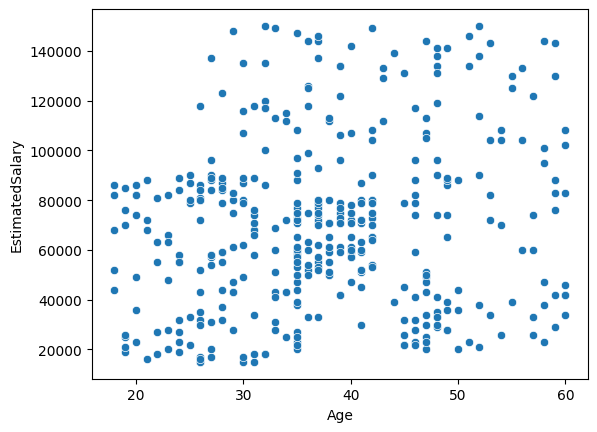

In [42]:
# Creating a scatter plot to visualize the relationship between 'Age' and 'EstimatedSalary'
sns.scatterplot(x = 'Age' , y = 'EstimatedSalary' , data = df )

In [43]:
# Separating the features (Age and EstimatedSalary) and the target variable (Purchased)
x  = df.iloc[:,0:2] # Features: Age and EstimatedSalary
y = df.iloc[:, -1] # Target variable: Purchased

In [44]:
# Splitting the data into training and testing sets for model evaluation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2) # 80% for training, 20% for testing

# Building a Model

In [45]:
# Creating a Sequential model, which is a linear stack of layers
model = Sequential()

# Adding a Dense layer with 128 neurons and ReLU activation function.
# The input dimension is 2, corresponding to 'Age' and 'EstimatedSalary'.
model.add(Dense(128, activation='relu', input_dim=2))

# Adding the output Dense layer with 1 neuron and a sigmoid activation function for binary classification
model.add(Dense(1, activation='sigmoid'))

In [46]:
# Displaying a summary of the model's architecture, including the number of parameters
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Compiling the model with the Adam optimizer, binary crossentropy loss function, and accuracy as the evaluation metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
# Training the model using the training data and validating with the testing data for 100 epochs
history = model.fit(x_train, y_train, validation_data= (x_test , y_test), epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5575 - loss: 1001.4664 - val_accuracy: 0.4000 - val_loss: 233.8790
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5319 - loss: 218.0407 - val_accuracy: 0.6000 - val_loss: 124.8658
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5175 - loss: 126.2167 - val_accuracy: 0.6000 - val_loss: 230.2181
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5562 - loss: 172.7263 - val_accuracy: 0.6000 - val_loss: 127.5822
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5941 - loss: 99.1222 - val_accuracy: 0.6000 - val_loss: 97.5639
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5830 - loss: 67.5085 - val_accuracy: 0.3500 - val_loss: 14.5687
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4440 - loss: 16.0482 - val_accuracy: 0.4000 - val_loss: 28.1058
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4763 - loss: 24

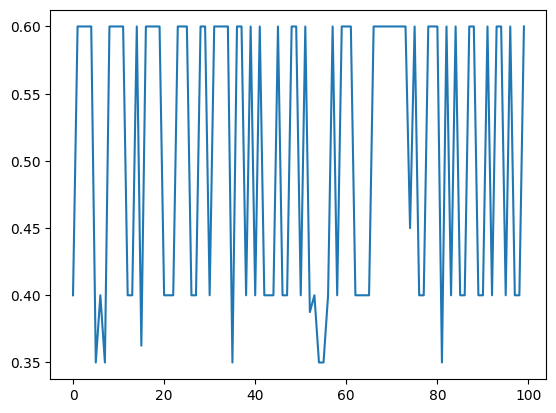

In [49]:
# Plotting the validation accuracy over epochs to visualize the model's performance during training
plt.plot(history.history['val_accuracy'])

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


<Axes: >

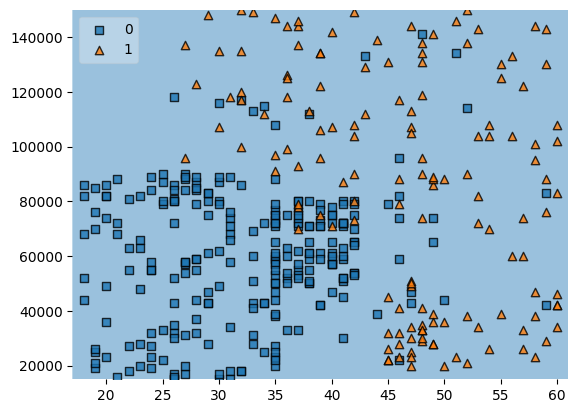

In [50]:
# Importing the plot_decision_regions function from mlxtend for visualizing decision boundaries
from mlxtend.plotting import plot_decision_regions

# Plotting the decision boundaries of the trained model on the original data
plot_decision_regions(x.values, y.values, clf=model, legend=2)

# **Feature Engineering Techniques for Numerical Data:**

**1. Standardization (Z-score Normalization):**
   - Description: This technique transforms the features to have a mean of 0 and a standard deviation of 1.
   
   It's useful when the features have different scales and units, and algorithms that are sensitive to feature scaling are used (e.g., SVM, Logistic Regression, K-Nearest Neighbors).

   - Formula:

     X_standardized = (X - mean(X)) / std(X)

     Where:

       X is the original feature value.
       mean(X) is the mean of the feature.
       std(X) is the standard deviation of the feature.

**2. Normalization (Min-Max Scaling):**

   - Description: This technique scales the features to a fixed range, typically between 0 and 1.
   
   It's useful when you want to preserve the relationships between the original values while ensuring they are within a specific range.
   
   This is often used in image processing and in algorithms that require input values to be within a bounded range (e.g., Neural Networks).

   - Formula:

     X_normalized = (X - min(X)) / (max(X) - min(X))

     Where:

       X is the original feature value.
       min(X) is the minimum value of the feature.
       
       max(X) is the maximum value of the feature.

Applying scaling

In [51]:
# Importing StandardScaler from sklearn.preprocessing for feature scaling
from sklearn.preprocessing import StandardScaler

# Creating a StandardScaler object
scaler = StandardScaler()

# Fitting the scaler on the training data and transforming both training and testing data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [52]:
# Displaying the scaled training data
x_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

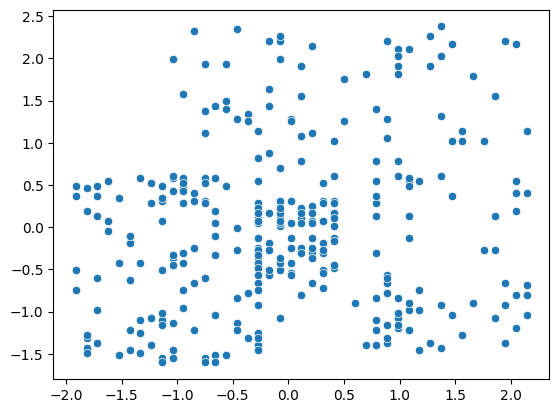

In [53]:
# Creating a scatter plot to visualize the scaled training data
sns.scatterplot ( x = x_train_scaled[:,0] , y = x_train_scaled[:,1])

In [54]:
# Creating a new Sequential model for training with scaled data
model_1 = Sequential()

# Adding a Dense layer with 128 neurons and ReLU activation function.
# The input dimension is 2, corresponding to 'Age' and 'EstimatedSalary'.
model_1.add(Dense(128, activation='relu', input_dim=2))

# Adding the output Dense layer with 1 neuron and a sigmoid activation function for binary classification
model_1.add(Dense(1, activation='sigmoid'))

# Compiling the model with the Adam optimizer, binary crossentropy loss function, and accuracy as the evaluation metric
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model using the scaled training data and validating with the scaled testing data for 100 epochs
history = model_1.fit(x_train_scaled, y_train, validation_data= (x_test_scaled , y_test), epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.4618 - loss: 0.6942 - val_accuracy: 0.8125 - val_loss: 0.6426
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8361 - loss: 0.6318 - val_accuracy: 0.8000 - val_loss: 0.5871
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8092 - loss: 0.5801 - val_accuracy: 0.7875 - val_loss: 0.5406
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8198 - loss: 0.5416 - val_accuracy: 0.7875 - val_loss: 0.5012
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8438 - loss: 0.4911 - val_accuracy: 0.7875 - val_loss: 0.4684
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8541 - loss: 0.4764 - val_accuracy: 0.7875 - val_loss: 0.4396
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8642 - loss: 0.4412 - val_accuracy: 0.8250 - val_loss: 0.4159
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8400 - loss: 0.4342 - val_accuracy: 0.

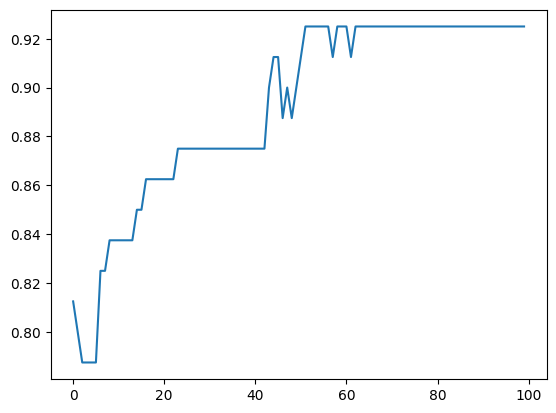

In [55]:
# Plotting the validation accuracy over epochs for the model trained on scaled data
plt.plot (history.history['val_accuracy'])

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


<Axes: >

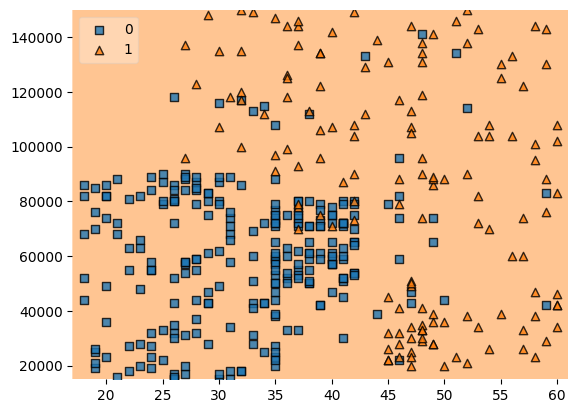

In [56]:
# draw a decision boundris on trained model

# Importing the plot_decision_regions function from mlxtend for visualizing decision boundaries
from mlxtend.plotting import plot_decision_regions

# Plotting the decision boundaries of the model trained on scaled data
plot_decision_regions(x.values, y.values, clf=model_1, legend=2)